# HANDWRITTEN DIGITS CLASSIFICATION (MNIST DATASET)

## IMPORTING LIBRARIES

In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
import random
from sklearn.datasets import fetch_openml

In [10]:
sns.set(rc={'figure.figsize':(10.75,6.5)})
sns.set_style('whitegrid')

## Reading the MNIST Dataset

In [11]:
mnist = fetch_openml('mnist_784')
pixels=pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
labels=mnist.target

In [12]:
pixels.shape #Total pixels=784, needs to reshape into 28x28 to view the actual image

(70000, 784)

### COUNT PLOT OF THE DIGITS RANGING 0-9 

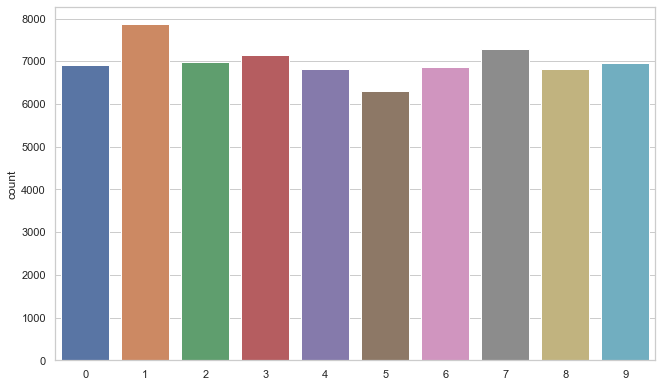

In [13]:
sns.countplot(x=labels);

### SPLITTING THE DATASET INTO TRAIN AND TEST SET

In [14]:
train_x,test_x,train_y, test_y=train_test_split(pixels, labels,
                                                random_state=3,
                                                test_size=0.03)

### SOME SAMPLE IMAGES

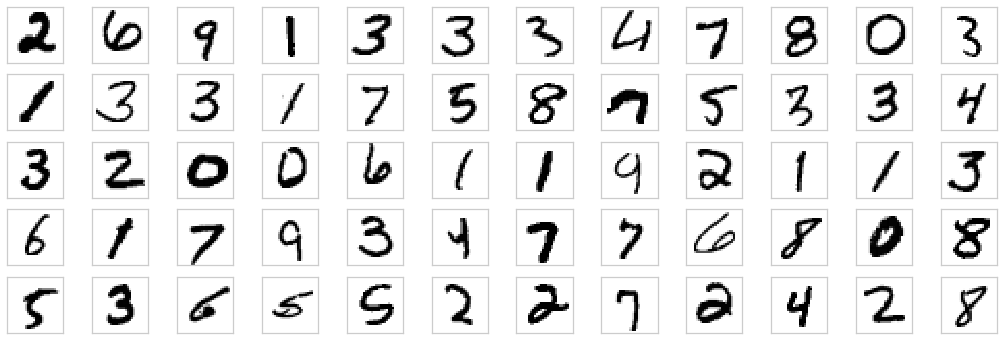

In [15]:
fig1, ax=plt.subplots(5, 12,figsize=(18,6))
ax=ax.reshape(-1)

img_no=0
for i in range(len(ax)):
    image=train_x.iloc[img_no,:].to_numpy().reshape(28,28)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].imshow(image,cmap=matplotlib.cm.binary)
    img_no=random.randint(0,len(train_x.index)-1)

## FITTING THE PIXELS INTO K-NN CLASSIFIER MODEL

In [16]:
SVMmodel=SVC(kernel='rbf').fit(train_x,train_y)

## Predicting the labels of test dataset

In [17]:
pred_labels=SVMmodel.predict(test_x)

## Accuracy score and Misclassified labels count

In [18]:
accuracy=accuracy_score(test_y, pred_labels)
print('Accuracy = {}'.format(accuracy))
print('Misclassified labels count : {}'.format((pred_labels!=test_y).sum()))

Accuracy = 0.9738095238095238
Misclassified labels count : 55


## SOME RANDOM SAMPLE IMAGES FROM TEST DATASET

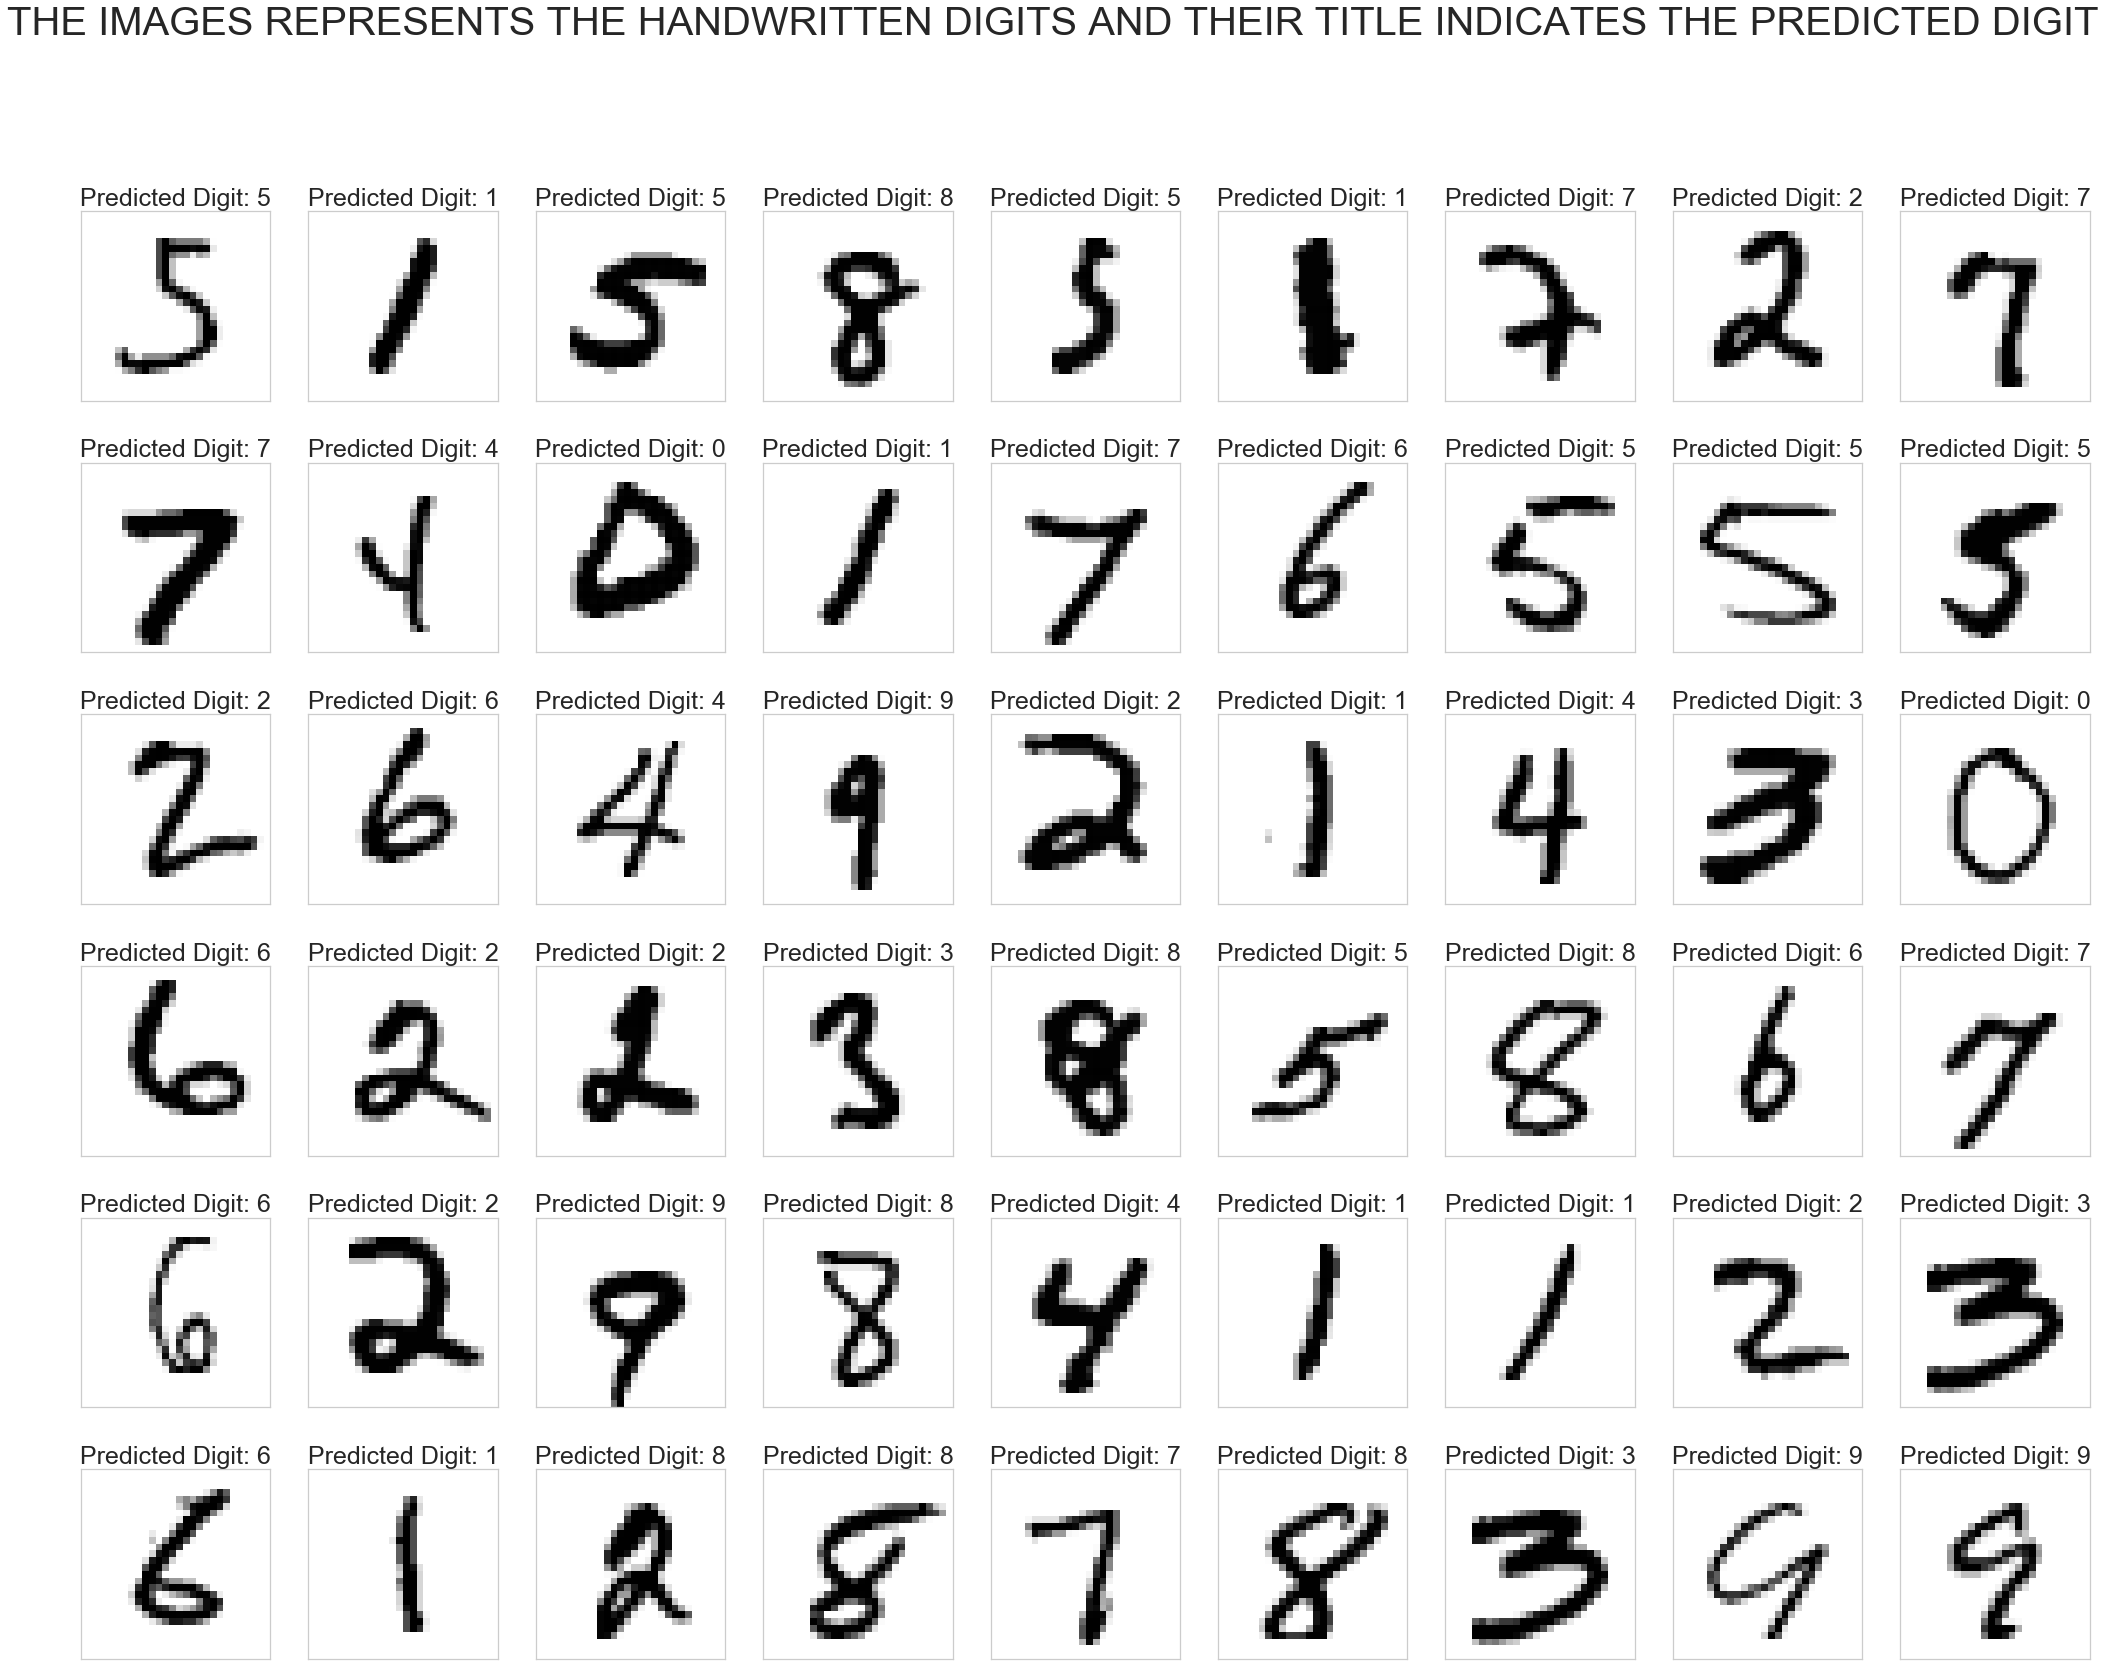

In [19]:
fig2,axes = plt.subplots(6,9,figsize=(36,27))
axes=axes.reshape(-1)
fig2.suptitle('THE IMAGES REPRESENTS THE HANDWRITTEN DIGITS AND THEIR TITLE INDICATES THE PREDICTED DIGIT',fontsize=40)
#plt.subplots_adjust(top=0.83)

test_img_no=0
for i in range(len(axes)):
    test_image=test_x.iloc[test_img_no,:].to_numpy().reshape(28,28)
    axes[i].set_title('Predicted Digit: {}'.format(pred_labels[test_img_no]),
                      fontsize=25)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].imshow(test_image,cmap=matplotlib.cm.binary)
    test_img_no=random.randint(0,len(test_x.index)-1)